In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

In [76]:
errors = np.random.normal(0, 1, 400)

In [77]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [78]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [79]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

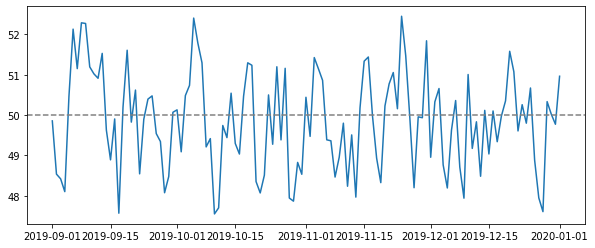

In [80]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [81]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

<BarContainer object of 10 artists>

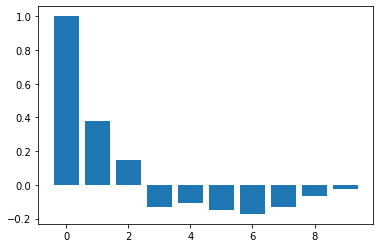

In [82]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 20 artists>

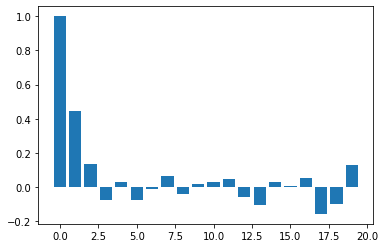

In [56]:
pacf_vals = pacf(series)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [57]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [58]:
model = ARIMA(train_data, order=(0,1,2))
model1=sm.tsa.statespace.SARIMAX(train_data,order=(0, 0, 2))

In [67]:
model_fit = model.fit()

In [68]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -179.939
Date:                Tue, 30 Nov 2021   AIC                            365.878
Time:                        20:47:44   BIC                            374.240
Sample:                    09-01-2019   HQIC                           369.274
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5910      0.094     -6.298      0.000      -0.775      -0.407
ma.L2         -0.2237      0.084     -2.662      0.008      -0.388      -0.059
sigma2         1.1653      0.126      9.246      0.0

In [69]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [70]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [71]:
residuals = test_data - predictions

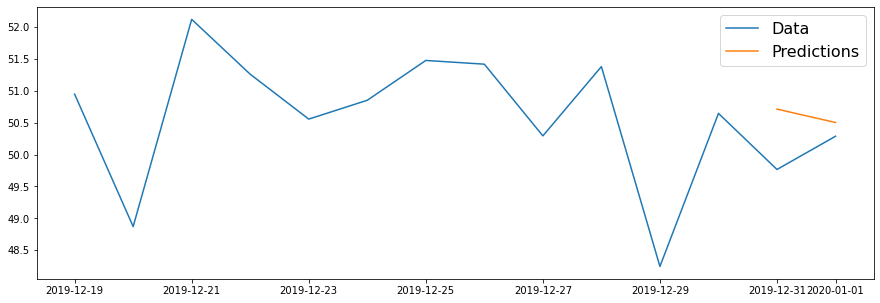

In [72]:
plt.figure(figsize=(15,5))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [73]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0117


In [74]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.6865859706405463
